In [44]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np

# Global metrics

In [7]:
with open('/home/acarlier/code/project_ornithoScope/src/data/pickles/MobileNet_2022-04-29-15:12:12/P_R_F1_global_MobileNet_input_test.p', 'rb') as fp:
    _ = pickle.load(fp)
_

[0.801, 0.864, 0.832]

In [9]:
with open('../../data/pickles/mobilenet_caped_labels_100/P_R_F1_global_MobileNet_input_test.p', 'rb') as fp:
    _ = pickle.load(fp)
_


[0.831, 0.754, 0.791]

In [12]:
# random: Globals: P=0.856 R=0.933 F1=0.893
efficientDet0 = {'p':0.835,'r':0.802,'f': 0.818}
efficientDet1 = {'p':0.814, 'r':0.851, 'f':0.832}
mobileNetV1_split_specific = {'p':0.887,'r':0.91,'f':0.899}
mobileNetV1_split_random = {'p':0.856,'r':0.933,'f':0.893}
mobileNetV1_caped_labels_300 = {'p':0.857, 'r':0.79, 'f':0.823} 
mobileNetV1_split_random_caped_labels_300 = {'p':0.784, 'r':0.56, 'f':0.653}
mobileNetV1_caped_labels_100 = {'p':0.831,'r':0.754,'f':0.791}

In [3]:
def plot_global_metrics(res1,res2,res3):
    labels = ['Precision', 'Recall', 'F1-Score']
    # print(list(res1.values()))
    # print(list(res2.values()))    
    res1_values = list(res1.values())
    res2_values = list(res2.values())
    res3_values = list(res3.values())

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, res1_values, width, label='mobileNetV1_split_specific')
    rects2 = ax.bar(x, res2_values, width, label='mobileNetV1_caped_labels_300')
    rects3 = ax.bar(x + width/2, res3_values, width, label='mobileNetV1_caped_labels_100')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Score')
    ax.set_title('MobileNetV1-YOLOv2 with and without random split')
    ax.set_xticks(x, labels)
    ax.legend(loc=3)

    ax.bar_label(rects1, padding=0)
    ax.bar_label(rects2, padding=0)
    ax.bar_label(rects3, padding=0)

    #fig.tight_layout()
    plt.savefig("/home/acarlier/code/project_ornithoScope/src/data/img_plot/globals/mobilenetv1_full_vs_300_vs_100.jpg",bbox_inches='tight',dpi=100)   

    plt.show()


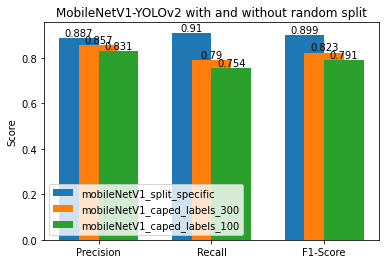

In [22]:
plot_global_metrics(mobileNetV1_split_specific,mobileNetV1_caped_labels_300,mobileNetV1_caped_labels_100)

# Metrics per classes

In [81]:
dir_path = '/home/acarlier/code/project_ornithoScope/src/data/pickles/data_augmentation/MobileNet_cap300_v2_per_tasks'
files = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))]
print(files)
#files = ['MobileNet_caped_300_data_aug_v2']

['prediction_TP_FP_FN_MobileNet_task_20210612_1_Lab.p', 'P_R_F1_global_MobileNet_task_20210526_UPS.p', 'P_R_F1_MobileNet_task_20211204_Orlu.p', 'P_R_F1_MobileNet_task_2021-03-01_10.p', 'prediction_TP_FP_FN_MobileNet_task_20210526_UPS.p', 'TP_FP_FN_MobileNet_task_20210612_1_Lab.p', 'P_R_F1_global_MobileNet_task_20210611_Lab.p', 'P_R_F1_MobileNet_task_21-01-2021.p', 'P_R_F1_global_MobileNet_task_2021-03-01_09.p', 'TP_FP_FN_MobileNet_task_20210526_UPS.p', 'TP_FP_FN_MobileNet_task_20210611_Lab.p', 'TP_FP_FN_MobileNet_task_20211204_Orlu.p', 'P_R_F1_MobileNet_task_20210612_1_Lab.p', 'TP_FP_FN_MobileNet_task_21-01-2021.p', 'prediction_TP_FP_FN_MobileNet_task_2021-03-01_10.p', 'P_R_F1_global_MobileNet_task_21-01-2021.p', 'prediction_TP_FP_FN_MobileNet_task_2021-03-01_09.p', 'prediction_TP_FP_FN_MobileNet_task_21-01-2021.p', 'TP_FP_FN_MobileNet_task_20210705-07_balacet.p', 'P_R_F1_MobileNet_task_20210611_Lab.p', 'P_R_F1_global_MobileNet_task_2021-03-01_10.p', 'P_R_F1_MobileNet_task_20210705-07_

In [93]:
def from_file_to_df(file, _columns=[]):
    file_loaded = pd.read_pickle(file)
    df_file_loaded = pd.DataFrame(file_loaded,columns=_columns)
    return df_file_loaded

def plot_PRF_global(file):
    #df = from_file_to_df(file, ['Specie','Precision','Rappel','F-score'])
    pass
    
def plot_TP_FP_FN(file, path_saving="../data/img_plot/"):
    # TP_FP_FN plotting
    # [{'Specie': 'MESCHA', 'TP': 15, 'FP': 15, 'FN': 1}, 
    #  {'Specie': 'SITTOR', 'TP': 0, 'FP': 0, 'FN': 0}, 
    #  {'Specie': 'MESBLE', 'TP': 0, 'FP': 0, 'FN': 4}]
    _ = from_file_to_df(file, ['Specie','TP','FP','FN'])
    #print(_)
    df = _.set_index('Specie')
    task_name = file.split('/')[-1]
    ax = df.plot(kind="bar", title=f"{task_name}", figsize = (10,7))
    for container in ax.containers:
        ax.bar_label(container)
    plt.tight_layout()
    plt.savefig(f"{path_saving}/{task_name}.jpg",bbox_inches='tight',dpi=100)
    return df

def plot_PRF(file, path_saving="../data/img_plot/"):
    # P_R_F1_MobileNet plotting
    # [{'Specie': 'MESCHA', 'Precision': 0.763, 'Rappel': 0.987, 'F-score': 0.861}, 
    # {'Specie': 'SITTOR', 'Precision': 1.0, 'Rappel': 0.143, 'F-score': 0.25},
    _ = from_file_to_df(file, ['Specie','Precision','Rappel','F-score'])
    df = _.set_index('Specie')
    #print(df)
    task_name = file.split('/')[-1]
    ax = df.plot(kind="bar", title=f"{task_name}", figsize = (10,7))
    for container in ax.containers:
        ax.bar_label(container)
    plt.tight_layout()
    plt.savefig(f"{path_saving}/{task_name}.jpg",bbox_inches='tight',dpi=100)
    # ../data/img_plot/metrics_lab//Users/devasou/code/deva-sou/
    # project_ornithoScope/src/data/pickles/metrics_lab/
    # P_R_F1_MobileNet_task_20211204_Orlu.p.jpg

In [94]:
def plot_all_metrics(files):
    path = f"../../data/img_plot/{dir_path.split('/')[-1]}"
    #print(os.path.exists(path))
    if os.path.exists(path) is False:
        os.mkdir(path)
    for file in files:
        #print('file', file)
        if file.startswith('P_R_F1_MobileNet'):
            #pass
            print(f"P_R_F1 plotting for {dir_path}/{file}")
            plot_PRF(f"{dir_path}/{file}",path)
        elif file.startswith('P_R_F1_global'):
            pass
            #print('P_R_F1_global plotting')
            #plot_PRF_global(f"{dir_path}/{file}",path)
        elif file.startswith('TP_FP_FN'):
            #pass
            print(f"TP_FP_FN plotting for {dir_path}/{file}")
            plot_TP_FP_FN(f"{dir_path}/{file}",path)

P_R_F1 plotting for /home/acarlier/code/project_ornithoScope/src/data/pickles/data_augmentation/MobileNet_cap300_v2_per_tasks/P_R_F1_MobileNet_task_20211204_Orlu.p
P_R_F1 plotting for /home/acarlier/code/project_ornithoScope/src/data/pickles/data_augmentation/MobileNet_cap300_v2_per_tasks/P_R_F1_MobileNet_task_2021-03-01_10.p
TP_FP_FN plotting for /home/acarlier/code/project_ornithoScope/src/data/pickles/data_augmentation/MobileNet_cap300_v2_per_tasks/TP_FP_FN_MobileNet_task_20210612_1_Lab.p
P_R_F1 plotting for /home/acarlier/code/project_ornithoScope/src/data/pickles/data_augmentation/MobileNet_cap300_v2_per_tasks/P_R_F1_MobileNet_task_21-01-2021.p
TP_FP_FN plotting for /home/acarlier/code/project_ornithoScope/src/data/pickles/data_augmentation/MobileNet_cap300_v2_per_tasks/TP_FP_FN_MobileNet_task_20210526_UPS.p
TP_FP_FN plotting for /home/acarlier/code/project_ornithoScope/src/data/pickles/data_augmentation/MobileNet_cap300_v2_per_tasks/TP_FP_FN_MobileNet_task_20210611_Lab.p
TP_FP_FN

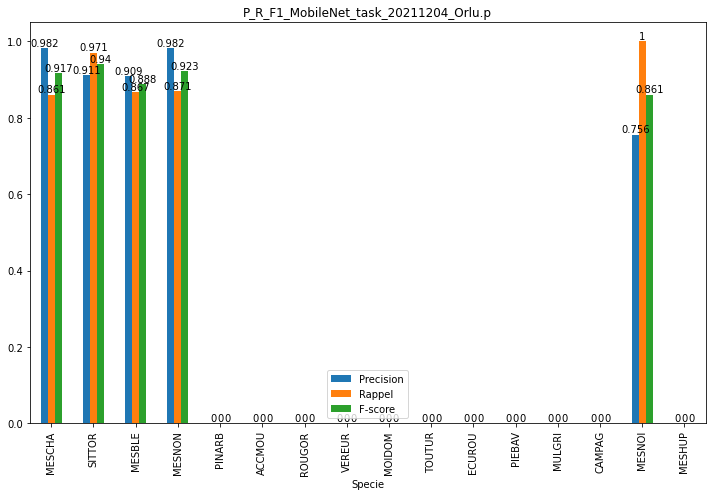

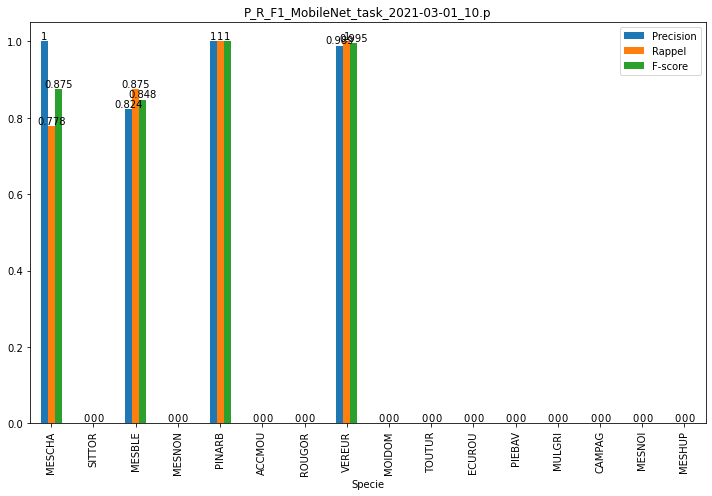

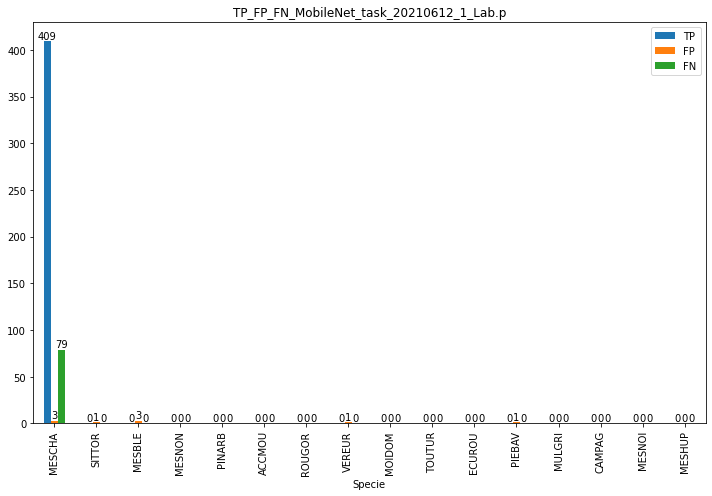

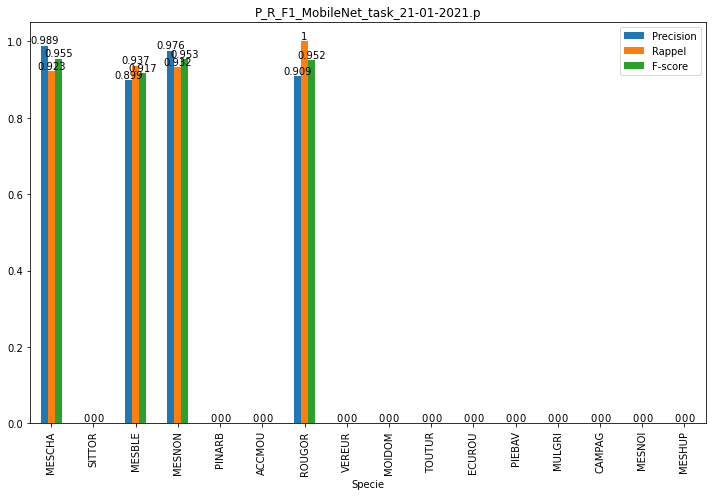

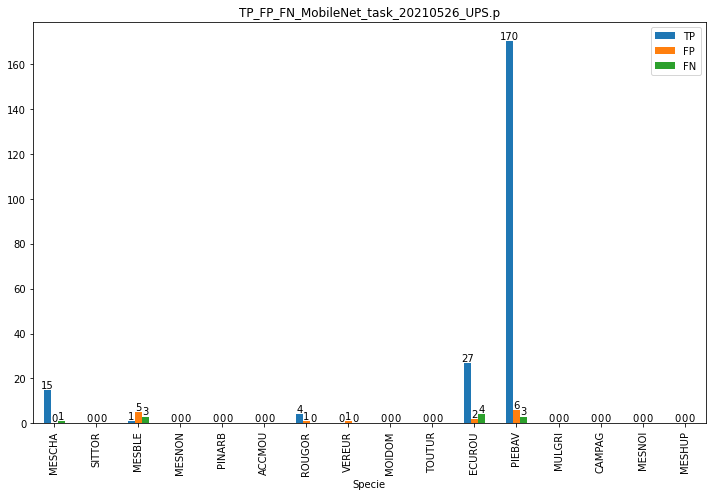

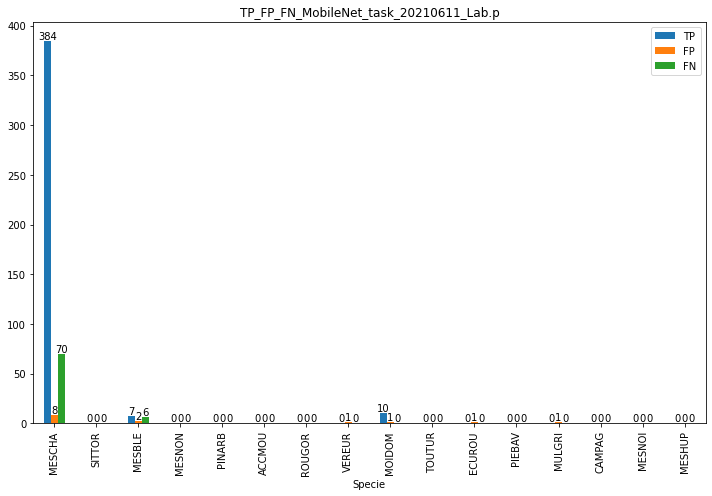

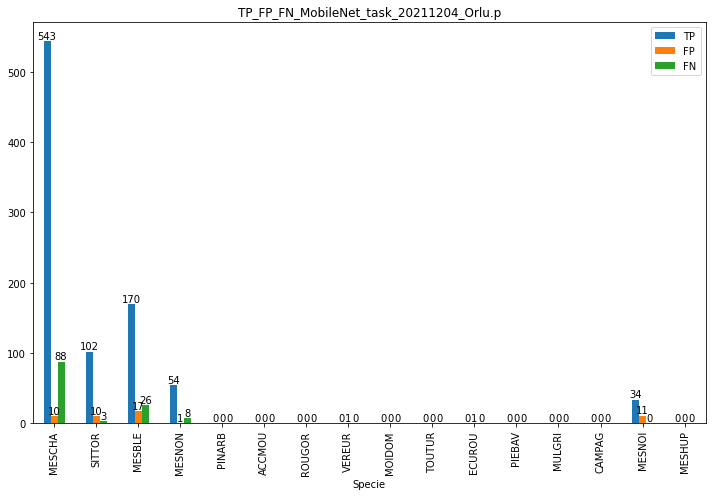

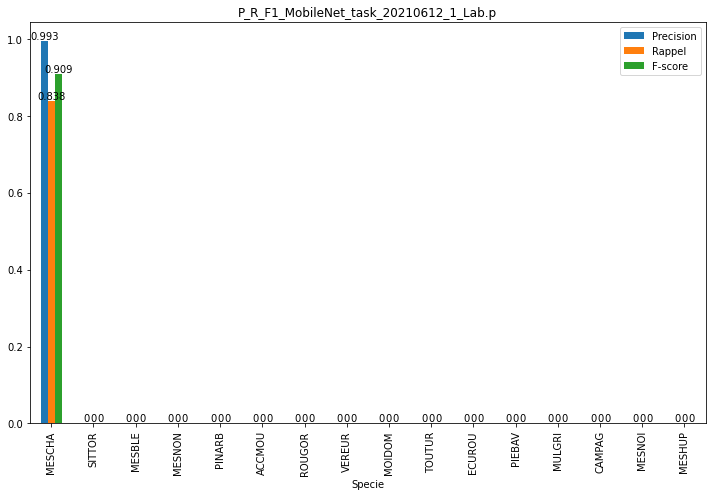

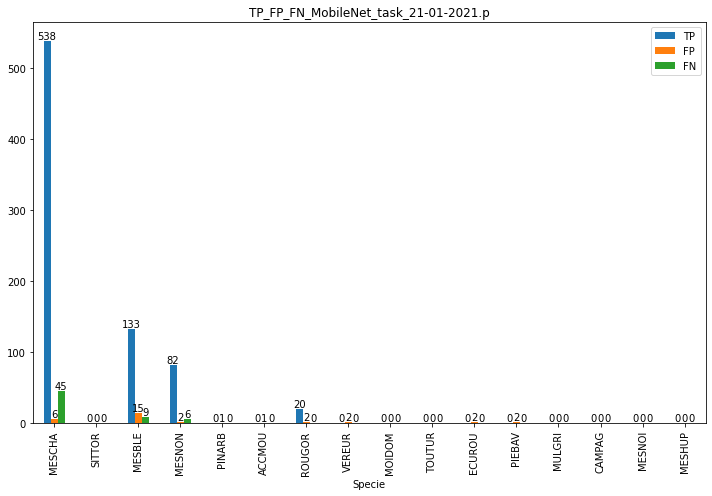

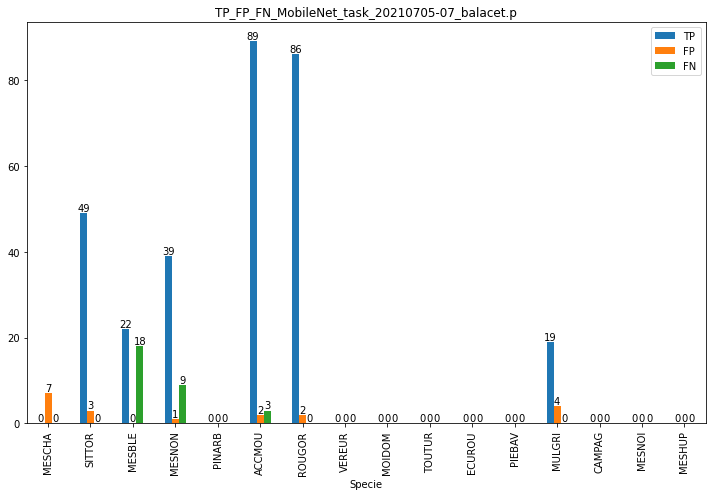

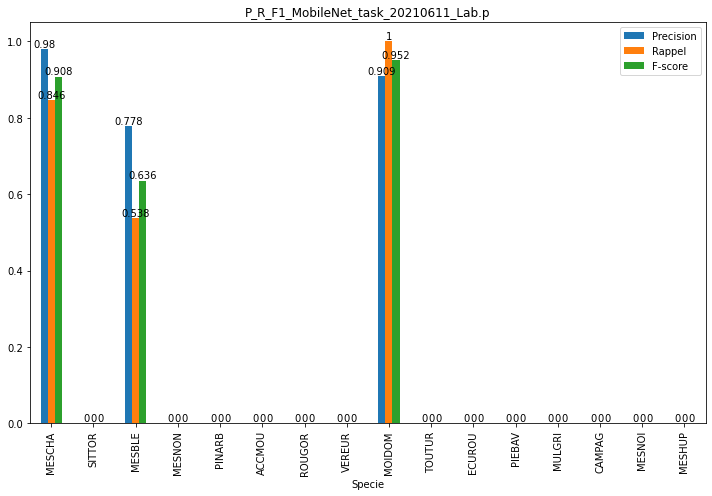

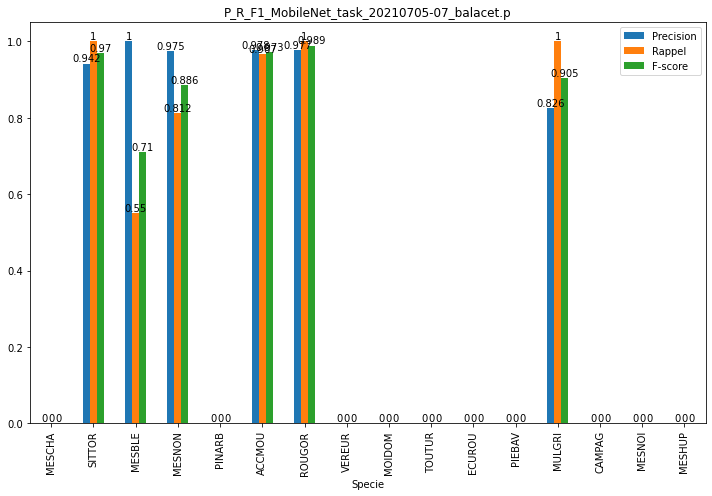

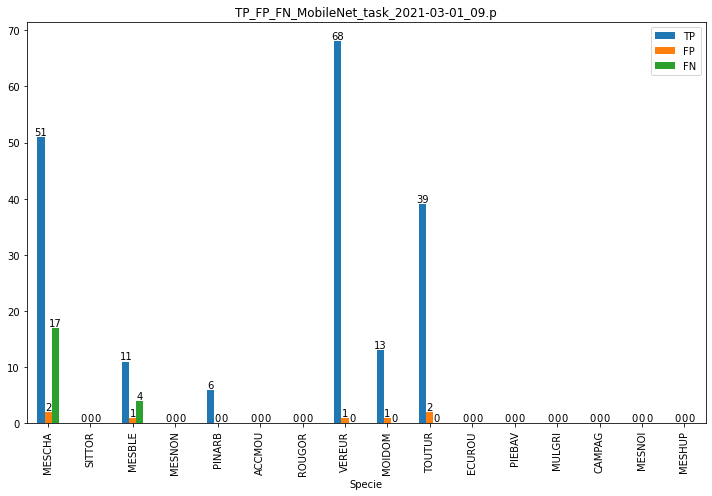

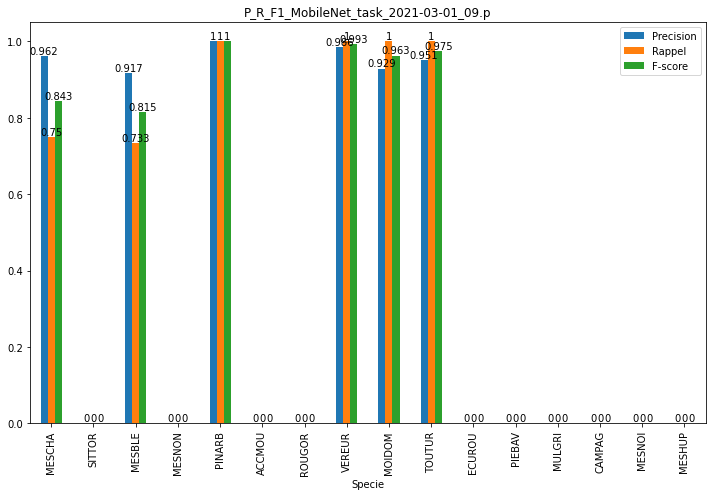

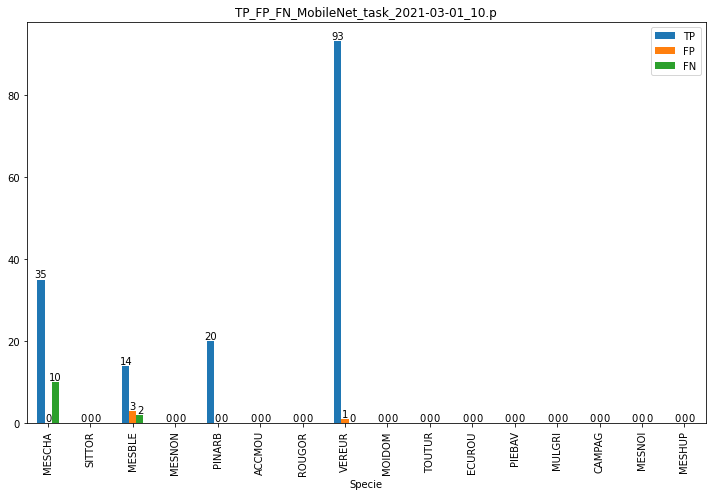

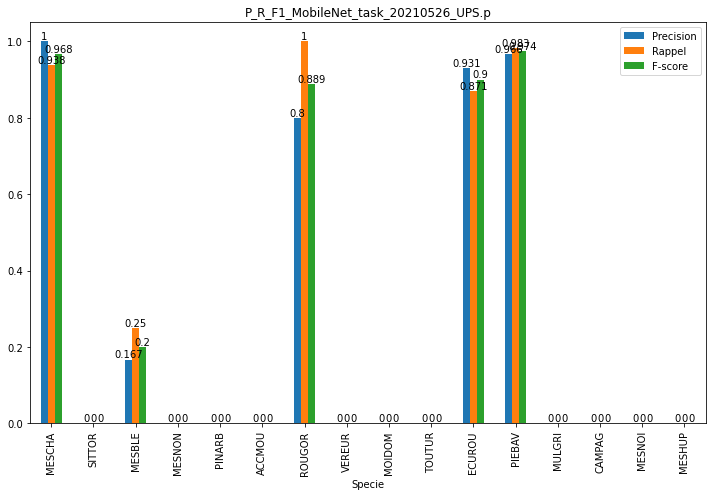

In [95]:
plot_all_metrics(files)

In [34]:
with open('../../data/pickles/data_augmentation/MobileNet_caped_300_data_aug_v2/P_R_F1_MobileNet_input_test.p', 'rb') as fp:
    file = pickle.load(fp)
file

[{'Specie': 'MESCHA', 'Precision': 0.982, 'Rappel': 0.864, 'F-score': 0.919},
 {'Specie': 'SITTOR', 'Precision': 0.915, 'Rappel': 0.981, 'F-score': 0.947},
 {'Specie': 'MESBLE', 'Precision': 0.886, 'Rappel': 0.84, 'F-score': 0.863},
 {'Specie': 'MESNON', 'Precision': 0.978, 'Rappel': 0.884, 'F-score': 0.928},
 {'Specie': 'PINARB', 'Precision': 0.963, 'Rappel': 1.0, 'F-score': 0.981},
 {'Specie': 'ACCMOU', 'Precision': 0.967, 'Rappel': 0.967, 'F-score': 0.967},
 {'Specie': 'ROUGOR', 'Precision': 0.957, 'Rappel': 1.0, 'F-score': 0.978},
 {'Specie': 'VEREUR', 'Precision': 0.953, 'Rappel': 1.0, 'F-score': 0.976},
 {'Specie': 'MOIDOM', 'Precision': 0.92, 'Rappel': 1.0, 'F-score': 0.958},
 {'Specie': 'TOUTUR', 'Precision': 0.951, 'Rappel': 1.0, 'F-score': 0.975},
 {'Specie': 'ECUROU', 'Precision': 0.818, 'Rappel': 0.871, 'F-score': 0.844},
 {'Specie': 'PIEBAV', 'Precision': 0.95, 'Rappel': 0.983, 'F-score': 0.966},
 {'Specie': 'MULGRI', 'Precision': 0.792, 'Rappel': 1.0, 'F-score': 0.884},
 

# Plot one file